<a href="https://colab.research.google.com/github/HanifRafandi014/3D_Machine_Learning/blob/main/3D_Hanif_Naufal_Rafandi_ML_Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Hanif Naufal Rafandi

Kelas : 3D / 14

Nim : 2141720127

# **Machine Learning Praktikum 1**



# Langkah 1 - Persiapan Data
Download dan letakkan file data yang akan digunakan pada direktori yang sama. Pastikan data telah disimpan dalam format CSV.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Langkah 2 - Import Library

In [3]:
# import package
import numpy as np
import pandas as pd

Import library NumPy dan Pandas yang digunakan untuk manipulasi data.

# Langkah 3 - Baca Data

In [4]:
# baca data dari file CSV
data = pd.read_csv('/content/drive/MyDrive/File Machine Learning/dataset.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Baca data dari file CSV dengan menggunakan Pandas.

# Langkah 4 - Pemahaman Terhadap Data

In [5]:
# melihat beberapa data awal
data.head()

# mengecek ukuran data
data.shape

# informasi tentang data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
# deskripsi data
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Tampilkan beberapa data awal, ukuran data, informasi data, dan deskripsi statistik data untuk memahami karakteristik data.

# Langkah 5 - Visualisasi Data

In [7]:
# import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

Import library Matplotlib dan Seaborn untuk visualisasi data.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


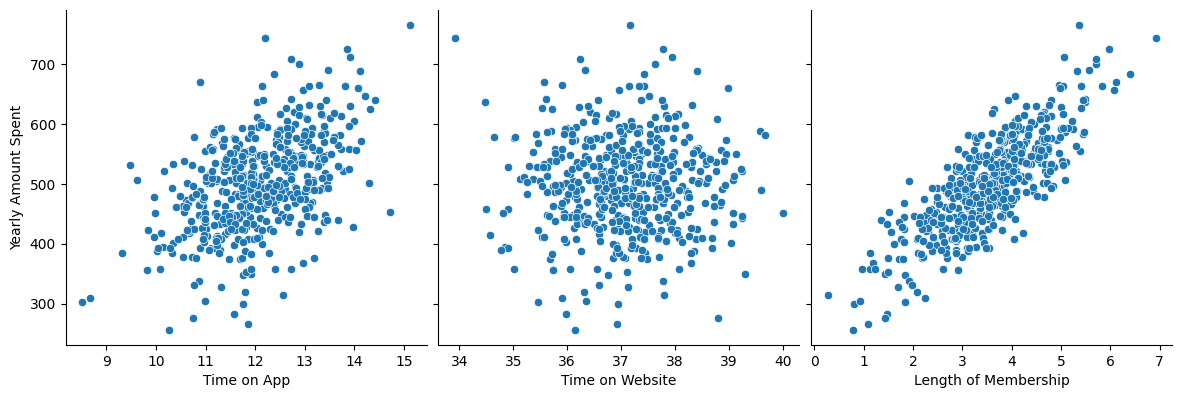

In [8]:
# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['Time on App', 'Time on Website', 'Length of Membership'],
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

Gunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

<ipython-input-9-9f46fa45ac4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)


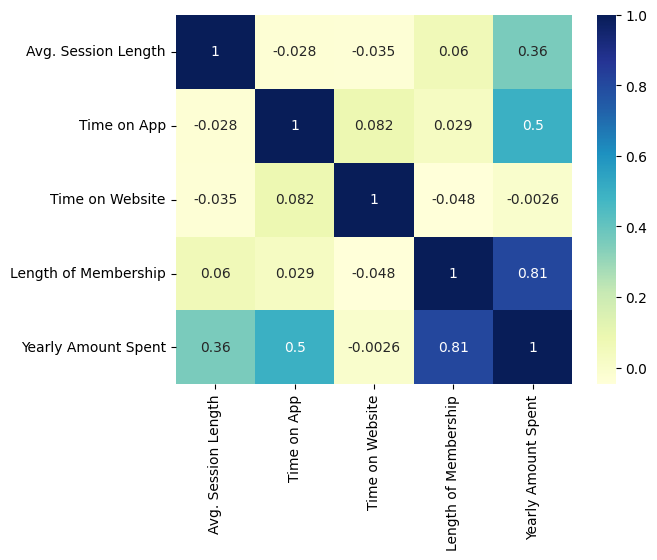

In [9]:
# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Gunakan heatmap untuk menampilkan matriks korelasi antara variabel-variabel dalam dataset. Semakin terang warna, semakin tinggi korelasinya.

# Langkah 6: Regresi Linier

In [10]:
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']
X.head()

0    4.082621
1    2.664034
2    4.104543
3    3.120179
4    4.446308
Name: Length of Membership, dtype: float64

Pisahkan variabel bebas (X) dan variabel target (y).

In [11]:
# Pembagian data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# hasil training dataset
X_train
y_train

153    657.019924
84     533.514935
310    479.614812
494    510.661792
126    516.831557
          ...    
343    576.025244
359    561.874658
323    473.360496
280    511.979860
8      570.200409
Name: Yearly Amount Spent, Length: 350, dtype: float64

Bagi data menjadi data latih (70%) dan data uji (30%) menggunakan train_test_split.

In [12]:
# Training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

#fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const                   265.248299
Length of Membership     66.301522
dtype: float64

In [13]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.669
Model:                             OLS   Adj. R-squared:                  0.668
Method:                  Least Squares   F-statistic:                     702.9
Date:                 Mon, 18 Sep 2023   Prob (F-statistic):           1.59e-85
Time:                         13:29:23   Log-Likelihood:                -1841.3
No. Observations:                  350   AIC:                             3687.
Df Residuals:                      348   BIC:                             3694.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  265.2483      9.120     29.083      0.000     247.311     283.186
Length of Membership    66.3015      2.501     26.512      0.000      61.383      71.220
==============================================================================
Omnibus:                        1.643   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.440   Jarque-Bera (JB):                1.471
Skew:                          -0.013   Prob(JB):                        0.479
Kurtosis:                       2.683   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lakukan training model regresi linier menggunakan library StatsModels. Tambahkan konstanta (intercept) ke variabel bebas.

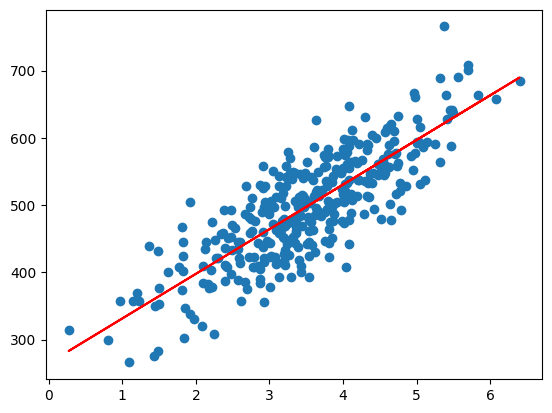

In [14]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

Visualisasikan garis regresi pada data latih.

# Langkah 7: Analisis Residual

dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y). Error = actual y value - y predicted value

In [15]:
# Prediksi nilai y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

# Menghitung residual
res = (y_train - y_train_pred)

Lakukan prediksi nilai y dari data latih dan hitung residual (selisih antara nilai sebenarnya dan nilai prediksi).

<ipython-input-16-c576a64ff6e7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


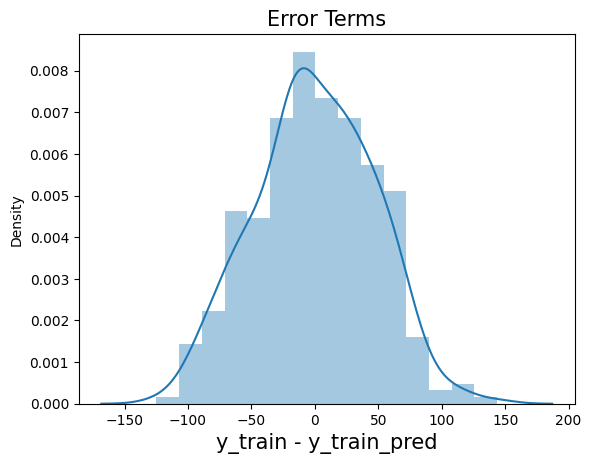

In [16]:
# Histogram residual
fig = plt.figure()
sns.distplot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

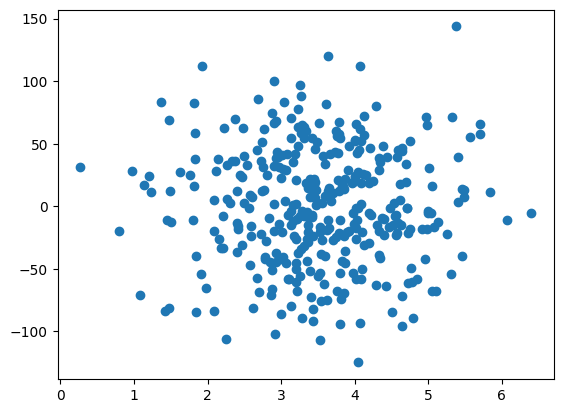

In [17]:
# Scatter plot residual
plt.scatter(X_train, res)
plt.show()

Visualisasikan residual dalam bentuk histogram dan scatter plot untuk mengevaluasi distribusi dan pola error.

# Langkah 8 - Prediksi pada Data Uji dan Evaluasi Model

In [18]:
# Prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

69     500.794385
29     579.688406
471    533.188991
344    446.066436
54     455.838449
dtype: float64

Lakukan prediksi pada data uji.

In [19]:
# Hitung nilai R-squared
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.611948913768747

Hitung nilai R-squared untuk mengukur kinerja model pada data uji.

# Langkah 9 - Visualisasi Hasil

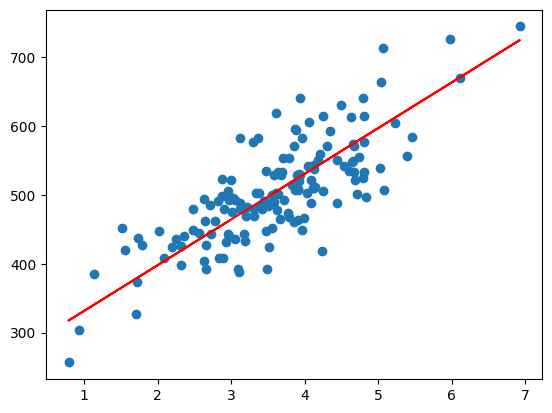

In [20]:
# Visualisasi data uji dan hasil prediksi
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

Visualisasikan data uji dan hasil prediksi dalam bentuk scatter plot.

# **Machine Learning Praktikum 2**

# Langkah 1 - Mengimpor Library
Lakukan import library yang diperlukan terlebih dahulu, termasuk NumPy, Matplotlib, dan pandas.

In [21]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Langkah 2 - Mengimpor Dataset
1. Pastikan sudah mendownload file CSV 'Posisi_gaji.csv' dan letakkan dalam direktori yang sama. Ini adalah dataset yang akan digunakan dalam praktikum ini.
2. Membaca dataset menggunakan pd.read_csv dan memilih fitur (variabel independen X) dan target (variabel dependen y).

In [22]:
# Mengimpor dataset (Pastikan Anda memiliki file CSV 'Posisi_gaji.csv' dalam direktori yang sama)
dataset = pd.read_csv('/content/drive/MyDrive/File Machine Learning/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values  # Ubah menjadi satu kolom saja
dataset.head()

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Langkah 3 - Feature Scaling
Menggunakan StandardScaler untuk melakukan penskalaan fitur X dan target y. Ini diperlukan karena SVM sangat sensitif terhadap skala data.

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

# Langkah 4 - Fitting SVR ke Dataset
Lakukan pembuatan model SVR dengan kernel RBF (Radial Basis Function) dan melatihnya dengan data yang telah di-scaled.

In [24]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

# Langkah 5 - Visualisasi Hasil SVR
lakukan visualisasi Menggunakan grafik untuk memvisualisasikan hasil prediksi model SVR. Ini mencakup plotting data asli (titik-titik merah) dan kurva hasil prediksi (garis biru) untuk tingkat posisi yang bervariasi.

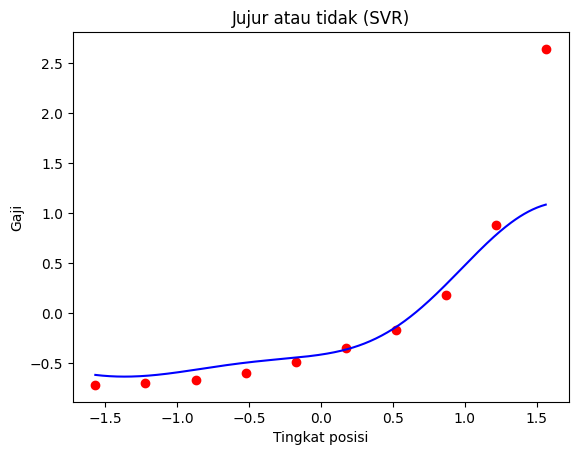

In [25]:
# Visualisasi hasil SVR (resolusi tinggi dan kurva yang lebih halus)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Jujur atau tidak (SVR)')
plt.xlabel('Tingkat posisi')
plt.ylabel('Gaji')
plt.show()

# Langkah 6 - Prediksi Hasil
1. Membuat array 2D yang berisi tingkat posisi yang akan diprediksi. Dalam contoh ini, tingkat posisi 6.5.
2. Menskalakan fitur prediksi menggunakan sc_X.transform.
3. Melakukan prediksi menggunakan model SVR yang telah dilatih.
4. Mengembalikan hasil prediksi ke dalam skala aslinya menggunakan sc_y.inverse_transform.

In [26]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

# Langkah 7 - Menampilkan Hasil
Menampilkan hasil prediksi gaji untuk tingkat posisi 6.5 dalam kode

In [27]:
# Menampilkan hasil prediksi
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


# Langkah 8 - Validasi Hasil
grafik dari model Support Vector Regression (SVR) yang telah dilatih untuk memprediksi gaji berdasarkan tingkat posisi. Grafik tersebut merupakan visualisasi dari hubungan antara tingkat posisi (x-axis) dan gaji (y-axis) setelah menerapkan model SVR.

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]

# Langkah 9 - Evaluasi Model SVR
Langkah terakhir adalah melakukan evaluasi model meliputi MAE, MSE dan R-squared

In [28]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membalikkan penskalaan pada data target yang sudah diprediksi
y_actual = sc_y.inverse_transform(y)
y_pred = regressor.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y_actual, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_actual, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 249500.11150357974
MSE: 142912240625.2814
RMSE: 378037.3534788347
R-squared: -0.7717363528203269


# **Tugas Praktikum**

Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

Catatan Tambahan:
1. Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
2. Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
3. Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

# **Jawaban No 1**

Variabel Bebas (Fitur):
1. age: Usia pribadi yang diasuransikan.
2. bmi: Indeks Massa Tubuh (Body Mass Index) pribadi.
3. children: Jumlah anak atau tanggungan yang diasuransikan.

Variabel Target:
1. charges: Biaya asuransi medis pribadi.

**Import Library**

In [29]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler


**Load Data**

In [42]:
# load data
insurance = pd.read_csv('/content/drive/MyDrive/File Machine Learning/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Informasi Data**

In [43]:
# mengecek ukuran data
insurance.shape

# informasi tentang data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
# deskripsi data
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Soal No 1**

Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [45]:
# Identifikasi variabel-variabel
X = insurance[['age', 'bmi', 'children']]  # X sebagai Variabel bebas
y = insurance['charges']                   # y sebagai Variabel target
X.head() # menampilkan table X variable

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [46]:
y.head() # menampilkan table y variable

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


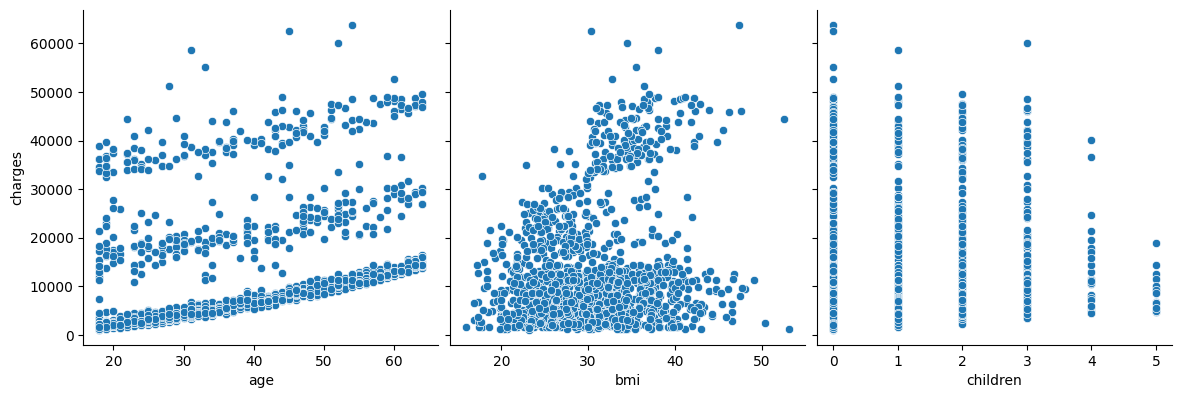

In [121]:
# visualisasi data dengan pairplot
sns.pairplot(insurance, x_vars=['age', 'bmi', 'children'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

<ipython-input-53-a984094c2915>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(insurance.corr(), cmap="YlGnBu", annot=True)


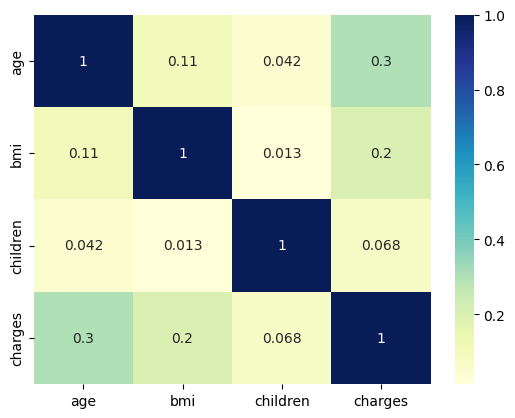

In [53]:
# visualisasi korelasi dengan heatmap
sns.heatmap(insurance.corr(), cmap="YlGnBu", annot=True)
plt.show()

**Soal No 2**

Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [55]:
# Jawaban No 2
# Membuat variabel bebas X dan Y, contoh pengambilan dari analisis korelasi sebelumnya
X = insurance['age']
y = insurance['charges']

In [94]:
# Bagi dataset menjadi data latih dan data uji menjadi 80 dan 20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=50)

# Training model
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

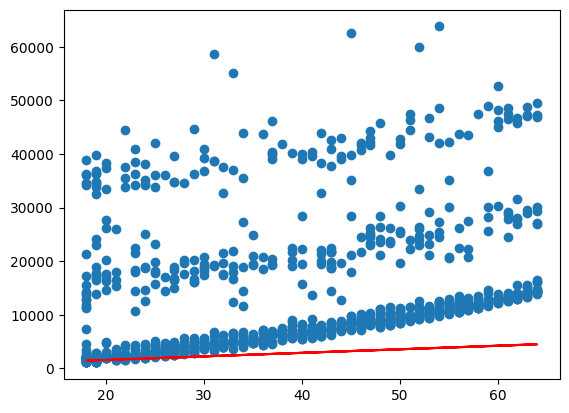

Jumlah data latih :  1070
Jumlah data uji :  268


In [96]:
# Visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

# menampilkan jumlah baris dalam setiap subset
print('Jumlah data latih : ', len(X_train))
print('Jumlah data uji : ', len(X_test))

In [97]:
X_train
y_train

1048     3594.17085
45      20630.28351
201      8871.15170
153     19964.74630
1251     1241.56500
           ...     
229      9225.25640
70      16577.77950
132     11163.56800
1313    36397.57600
109     47055.53210
Name: charges, Length: 1070, dtype: float64

**Soal No 3**

Lakukan feature scaling jika diperlukan.

In [98]:
# Feature scaling (Opsional)
# Inisialisasi StandardScaler
sc_X = StandardScaler()

# Feature Scaling pada X_train
X_train_scaled = sc_X.fit_transform(X_train.values.reshape(-1, 1))

# Feature Scaling pada X_test
X_test_scaled = sc_X.transform(X_test.values.reshape(-1, 1))

**Soal No 4**

Buat model multiple linear regression menggunakan Scikit-Learn.

In [108]:
# Buat model multiple linear regression
from sklearn.linear_model import LinearRegression
model_mlr = LinearRegression()
# Latih model dengan data latih
model_mlr.fit(X_train_scaled, y_train)

LinearRegression()

**Soal No 5**

Latih model pada data latih dan lakukan prediksi pada data uji.

In [110]:
# Lakukan prediksi pada data uji setelah mengubahnya menjadi array 2D
y_pred = model_mlr.predict(X_test_scaled)

**Soal No 6**

Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

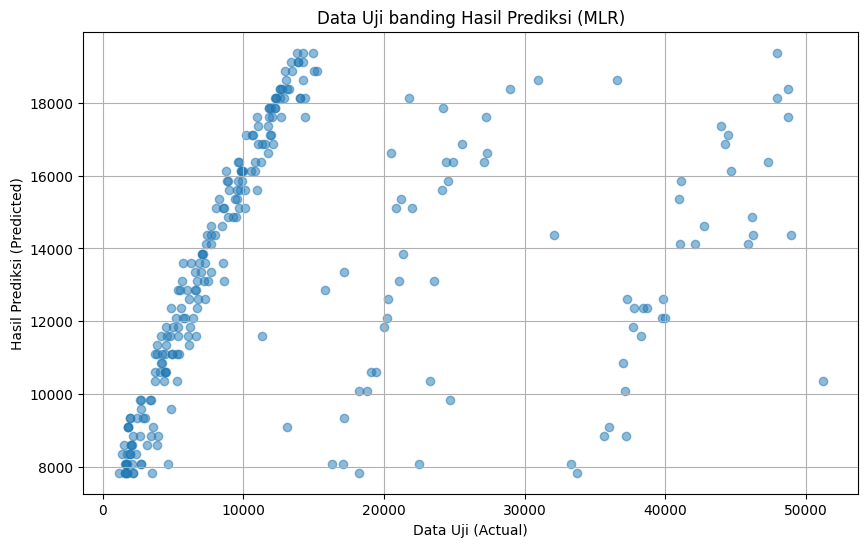

In [111]:
# Menghitung R-squared
r_squared = r2_score(y_test, y_pred)

# Menampilkan hasil prediksi dan nilai target
# Scatter plot data uji vs hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Data Uji banding Hasil Prediksi (MLR)')
plt.xlabel('Data Uji (Actual)')
plt.ylabel('Hasil Prediksi (Predicted)')
plt.grid(True)
plt.show()

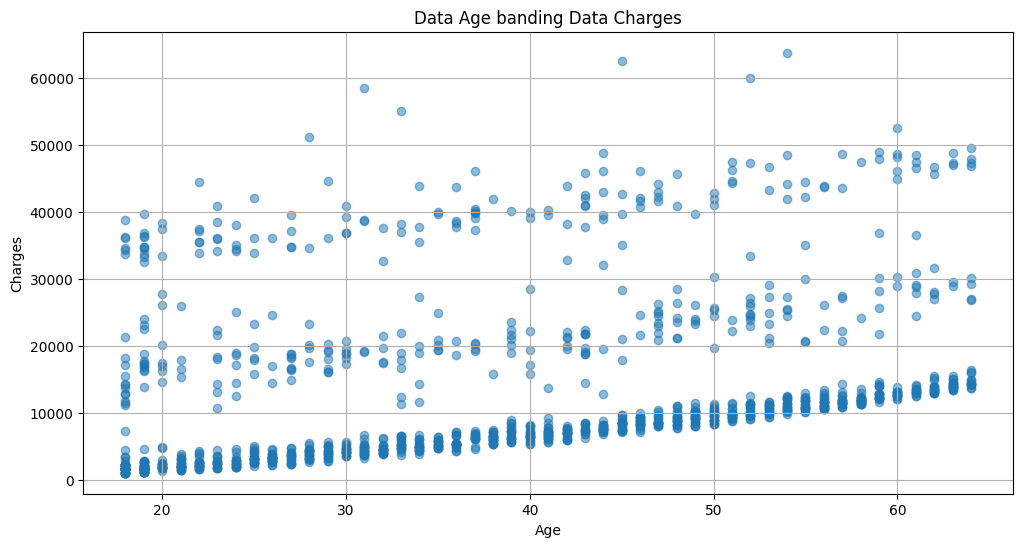

In [112]:
# Scatter plot untuk hubungan antara 'age' dan 'charges'
plt.figure(figsize=(12, 6))
plt.scatter(insurance['age'], insurance['charges'], alpha=0.5)
plt.title('Data Age banding Data Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

In [118]:
# Evaluasi model
# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung metrik evaluasi (misalnya, RMSE dan R-squared)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [119]:
# Tampilkan hasil evaluasi
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Nilai RMSE : ", rmse)

R-squared: 0.09346893645233456
Mean Squared Error: 145309348.26237297
Mean Absolute Error: 9326.57095826969
Nilai RMSE :  12054.432722545385


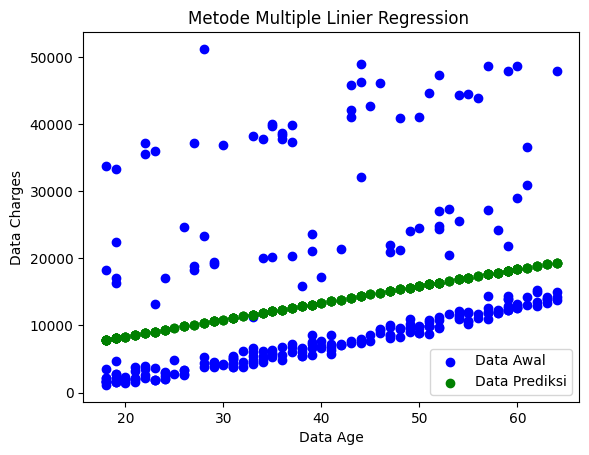

In [120]:
# Membuat plot multiple linier regression untuk age
plt.scatter(X_test, y_test, color='blue', label='Data Awal')
plt.scatter(X_test, y_pred, color='green', label='Data Prediksi')
plt.xlabel("Data Age")
plt.ylabel("Data Charges")
plt.title("Metode Multiple Linier Regression ")
plt.legend()
plt.show()